In [73]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [74]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [75]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [76]:
#흰색~검은색: 0~255
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [77]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


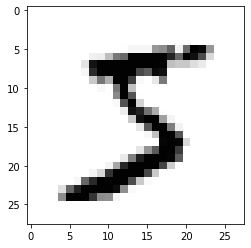

In [78]:
plt.imshow(X_train[0], cmap='Greys')

In [79]:
#1차원 배열로 data reshape
X_train_reshaped = X_train.reshape(60000, 784)
X_test_reshaped = X_test.reshape(10000, 784)
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [80]:
#Normalization, 255로 나누어 0~1사이의 값으로 바꿈.
X_train_n = X_train_reshaped.astype('float32')
X_test_n = X_test_reshaped.astype('float32')

gray_scale = 255
X_train_n = X_train_n / gray_scale
X_test_n = X_test_n / gray_scale
print(X_train_n[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [89]:
#one hot encoder
y_train_n = y_train.astype('float32')
y_test_n = y_test.astype('float32')

y_train_one = tf.one_hot(y_train_n,depth=10)
y_test_one = tf.one_hot(y_test_n,depth=10)

print(y_train_one.shape)
print(y_test_one.shape)

(60000, 10)
(10000, 10)


In [93]:
#* mlp layer 직접 구현하는 방법
#placeholder: 변수의 타입을 미리 설정해놓고 필요한 변수를 나중에 받아서 실행하는 것
x = tf.placeholder(tf.float32, (None, 784))
y = tf.placeholder(tf.float32, (None, 10))

In [108]:
#*
def mlp(x):
    #hidden layer1
    w1 = tf.Variable(tf.random_uniform([784, 256]))
    #784개의 input을 받음, 256개의 node가 있음.
    b1 = tf.Variable(tf.zeros([256]))
    #각 node마다 bias가 들어가기 때문에 bias 256개
    h1 = tf.nn.relu(tf.matmul(x,w1)+b1)
    #wx+b의 형태, activation function으로 relu 사용함.
    
    #hidden layer2
    w2 = tf.Variable(tf.random_uniform([256, 128]))
    b2 = tf.Variable(tf.zeros([128]))
    h2 = tf.nn.relu(tf.matmul(h1,w2)+b2)
    
    #output layer
    w3 = tf.Variable(tf.random_uniform([128,10]))
    #총 10개의 node, y값 0~9까지로 원핫인코딩 했기 때문에
    b3 = tf.Variable(tf.zeros([10]))
    value = tf.matmul(h2, w3)+b3
    
    return logits
    
logits = mlp(x)
#logits은 10개 class에 대한 점수

#//////
#logit value를 softmax에 넣어서 prediction을 받음.
#prediction을 cross entropy에 minimize해서 label을 얻음.

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
logits=logits, labels=y))

train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss_op)

#initialize
init = tf.global_variables_initializer()

#train 하이퍼파라미터
epoch = 30
batch_size = 1000
iteration = len(x_train) // batch_size

#training
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epoch):
        avg_loss=0.
        start=0; end = batch_size
        
        for i in range(iteration):
            _, loss = sess.run([train_op, loss_op],
                              feed_dict={x:x_train[start: end], y:y_train[start: end]})
            start += batch_size; end += batch_size
            #average loss
            avg_loss += loss/iteration
            
    preds = tf.nn.softmax(logits)
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("[Test Accuracy]: ",accuracy.eval({x:x_test, y:y_test}))
    
#/////

ValueError: Cannot feed value of shape (1000, 28, 28) for Tensor 'Placeholder:0', which has shape '(?, 784)'

In [111]:
#keras 사용해서 layer 생성하는 방법

from tensorflow.keras import layers

#MLP 모델 생성
model = keras.Sequential()
model.add(layers.Dense(512, input_dim=784, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

#모델 compile
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

#모델 학습
batch_size = 64
epochs = 50

history = model.fit(X_train_n, y_train_one, validation_split = 0.2,
                   batch_size = batch_size, epochs = epochs)

#모델 평가
loss_test, acc_test = model.evaluate(X_test_n, y_test_one)

print('loss_test',loss_test)
print('acc_test',acc_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.


ValueError: When using data tensors as input to a model, you should specify the `steps_per_epoch` argument.